<h1>Unmasking the Overdose Crisis: Connections Between COVID-19 Restrictions, Unemployment, and Drug Overdoses</h1>

<h3>Mauryan Uppalapati | Tulane CMPS 6790 | Milestone 2 | Fall 2023 </h3>

<h3>Project Outline : </h3>

The COVID-19 pandemic has affected many areas of life, including people’s health in ways other than just catching the virus. The rules put in place to stop the virus from spreading, along with job losses, have made life harder for many people. These challenges have led to an increase in drug overdose deaths, a problem that was already getting worse before the pandemic started.

**Why This Matters**:

Understanding why more people are dying from drug overdoses is important. These are deaths that we might be able to prevent. By looking closely at the numbers and the reasons behind them, we can help make better rules and support programs. The pandemic has changed things like how people socialize, how stressed they feel, and even the availability of drugs. Studying these changes can help us be better prepared for similar situations in the future.

**The Main Question**:

This project will look at how drug overdose deaths have changed since the COVID-19 pandemic started. We want to see if there’s a link between these changes and the strictness of lockdown rules and the rise in unemployment.

**How have the patterns and demographics of drug overdose deaths shifted since the onset of the COVID-19 pandemic, and what relationship do these trends have with the implementation of pandemic-related restrictions and Unemployment levels?”**

We will use data analysis and statistical models to understand these links better. What we find out could help leaders and health experts make smarter choices to stop overdose deaths now and in any future crises.

**In Summary**:

This project aims to use data to help guide decisions that could save lives. It’s about finding out what works best to reduce drug overdose deaths during tough times like a pandemic.

In [1]:
import pandas as pd
import numpy as np


<h3>Provisional Drug Overdose Death Counts </h3>

The first dataset we are using is  titled "VSRR Provisional Drug Overdose Death Counts" it tracks and reports on drug overdose-related deaths across different states in the United States. It includes data points from as early as 2015 and captures information on a monthly basis. Each record reflects various indicators related to drug overdose deaths, such as percentages of deaths where specific drugs were involved, the completeness of data reporting, and pending investigations. The dataset also includes footnotes for clarity and to address potential discrepancies with published reports.

You can access and download the dataset using the following link:

[VSRR Provisional Drug Overdose Death Counts Dataset](sandbox:/mnt/data/VSRR_Provisional_Drug_Overdose_Death_Counts_20231105.csv?_chatgptios_conversationID=13004e31-943e-4973-ad6c-51e92d61e40d&_chatgptios_messageID=c0caa33c-0afb-479e-a2a7-4c4b86e3d2bf).

In [24]:
drug_overdose_data = pd.read_csv('/Users/mauryan/Desktop/Final_Project/VSRR_Provisional_Drug_Overdose_Death_Counts_20231105.csv')
drug_overdose_data.head()


,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Percent with drugs specified,88.095238,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Methadone (T40.3),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


According to the dataset , the default attributes are described as:

- `State`: Abbreviation for U.S. states.
- `Year`: The year of the record.
- `Month`: The month of the record.
- `Period`: Describes the period of the count, here it is '12 month-ending'.
- `Indicator`: Describes the type of data, such as 'Percent with drugs specified', 'Heroin (T40.1)', etc.
- `Data Value`: The actual value for the indicator, which can be a count or a percentage.
- `Percent Complete`: The percentage of data that is complete.
- `Percent Pending Investigation`: The percentage of cases that are still pending investigation.
- `State Name`: The full name of the state.
- `Footnote`: Contains additional information or disclaimers about the data.
- `Footnote Symbol`: Symbol associated with the footnote.
- `Predicted Value`: This might be used for statistical predictions, but it's not clear from the head of the dataset if and how it's used since all shown entries are NaN.


Lets further examine this dataset, We can start by getting a summary of the dataset to see the number of non-null entries and the data types, then check for duplicates in the data and finally get a statistical summary of the numerical columns




In [27]:
summary_info = drug_overdose_data.info()

duplicates = drug_overdose_data.duplicated().sum()

statistical_summary = drug_overdose_data.describe()

summary_info, duplicates, statistical_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60600 entries, 0 to 60599
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          60600 non-null  object 
 1   Year                           60600 non-null  int64  
 2   Month                          60600 non-null  object 
 3   Period                         60600 non-null  object 
 4   Indicator                      60600 non-null  object 
 5   Data Value                     49567 non-null  float64
 6   Percent Complete               60600 non-null  float64
 7   Percent Pending Investigation  60600 non-null  float64
 8   State Name                     60600 non-null  object 
 9   Footnote                       56520 non-null  object 
 10  Footnote Symbol                56400 non-null  object 
 11  Predicted Value                39150 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usag

(None,
 0,
                Year    Data Value  Percent Complete  \
 count  60600.000000  4.956700e+04      60600.000000   
 mean    2018.722772  1.333396e+04         99.999901   
 std        2.437836  1.378764e+05          0.007035   
 min     2015.000000  1.000000e+01         99.500000   
 25%     2017.000000  9.642857e+01        100.000000   
 50%     2019.000000  3.150000e+02        100.000000   
 75%     2021.000000  1.270000e+03        100.000000   
 max     2023.000000  3.538076e+06        100.000000   
 
        Percent Pending Investigation  Predicted Value  
 count                   60600.000000     39150.000000  
 mean                        0.117025      1445.983499  
 std                         0.162914      6466.712059  
 min                         0.000000        10.000000  
 25%                         0.017018       100.000000  
 50%                         0.052665       318.000000  
 75%                         0.154303       859.000000  
 max                       

We can see that the dataset comprises 60,600 entries with no duplicate records. It contains a mix of numerical and categorical data across 12 columns. Here's a brief overview:

- There are no missing values in the 'State', 'Year', 'Month', 'Period', 'Indicator', 'Percent Complete', 'Percent Pending Investigation', and 'State Name' columns.
- The 'Data Value' column has 49,567 non-null entries, suggesting some missing data.
- The 'Footnote' and 'Footnote Symbol' columns have some missing entries as well.
- The 'Predicted Value' column has 39,150 non-null entries, also indicating missing data.
- The numerical data seems to vary widely, with some indicators like 'Data Value' having a maximum value of over 3.5 million, which could be a total count or a different type of aggregate measure.
- The 'Percent Complete' is consistently at or near 100%, while the 'Percent Pending Investigation' has a low mean of 0.117%, indicating that most of the data is finalized.
- There are no duplicate rows in the dataset, which is a good sign for data integrity.

We now need to address these missing values and ensuring the dataset is consistent and ready for analysis.

Let's proceed by looking into the unique indicators present in this dataset

In [30]:
drug_overdose_data["Indicator"].unique()

array(['Percent with drugs specified', 'Heroin (T40.1)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Methadone (T40.3)',
       'Psychostimulants with abuse potential (T43.6)',
       'Number of Drug Overdose Deaths',
       'Natural & semi-synthetic opioids (T40.2)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Synthetic opioids, excl. methadone (T40.4)', 'Cocaine (T40.5)',
       'Number of Deaths'], dtype=object)

We notice that a multitude of indicators are present but since only "Number of Drug Overdose Deaths" is pertinent to out investigation,we filter the dataset to keep only rows where the 'Indicator' column has the value 'Number of Drug Overdose Deaths'


In [31]:
overdose_deaths_data = drug_overdose_data[drug_overdose_data['Indicator'] == 'Number of Drug Overdose Deaths']

overdose_deaths_data.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
6,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,126.0
18,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,124.0
30,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,121.0
42,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,127.0
56,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,126.0


Let's re-evaluate our dataset for any missing values

In [32]:
missing_values = overdose_deaths_data.isnull().sum()

missing_values

State                              0
Year                               0
Month                              0
Period                             0
Indicator                          0
Data Value                         0
Percent Complete                   0
Percent Pending Investigation      0
State Name                         0
Footnote                         371
Footnote Symbol                  371
Predicted Value                    0
dtype: int64

In the filtered dataset, there are no missing values for most of the columns, including the 'Data Value' which is critical as it represents the number of overdose deaths. However, there are 371 missing entries in both the 'Footnote' and 'Footnote Symbol' columns. These columns typically provide additional context or information about the data and may not be essential for quantitative analysis.So we proceed by dropping both the 'Footnote' and 'Footnote Symbol' columns and we rename the 'Data Value' column as "Deaths"

In [33]:
overdose_deaths_data_cleaned = overdose_deaths_data.drop(['Footnote', 'Footnote Symbol'], axis=1)

overdose_deaths_data_cleaned.rename(columns={'Data Value': 'Deaths'}, inplace=True)

overdose_deaths_data_cleaned.head()

,State,Year,Month,Period,Indicator,Deaths,Percent Complete,Percent Pending Investigation,State Name,Predicted Value
6,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100.0,0.0,Alaska,126.0
18,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100.0,0.0,Alaska,124.0
30,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100.0,0.0,Alaska,121.0
42,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100.0,0.0,Alaska,127.0
56,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100.0,0.0,Alaska,126.0


We further clean this dataset by dropping 'Percent Complete' and 'Percent Pending Investigation' columns and resetting the index


In [38]:
overdose_deaths_data_final = overdose_deaths_data_cleaned.drop(['Percent Complete', 'Percent Pending Investigation'], axis=1)
overdose_deaths_data_final.reset_index(drop=True, inplace=True)

overdose_deaths_data_final.head(20)

,State,Year,Month,Period,Indicator,Deaths,State Name,Predicted Value
0,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,Alaska,126.0
1,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,Alaska,124.0
2,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,Alaska,121.0
3,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,Alaska,127.0
4,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,Alaska,126.0
5,AK,2015,July,12 month-ending,Number of Drug Overdose Deaths,117.0,Alaska,117.0
6,AK,2015,June,12 month-ending,Number of Drug Overdose Deaths,121.0,Alaska,121.0
7,AK,2015,March,12 month-ending,Number of Drug Overdose Deaths,125.0,Alaska,125.0
8,AK,2015,May,12 month-ending,Number of Drug Overdose Deaths,125.0,Alaska,125.0
9,AK,2015,November,12 month-ending,Number of Drug Overdose Deaths,115.0,Alaska,115.0


This dataset is now more focused, containing only the essential columns for analysis related to drug overdose deaths.
 
We can now proceed with some starting points for Exploratory Data Analysis (EDA) that help us to understand the structure of the data and highlight areas that may warrant deeper investigation.

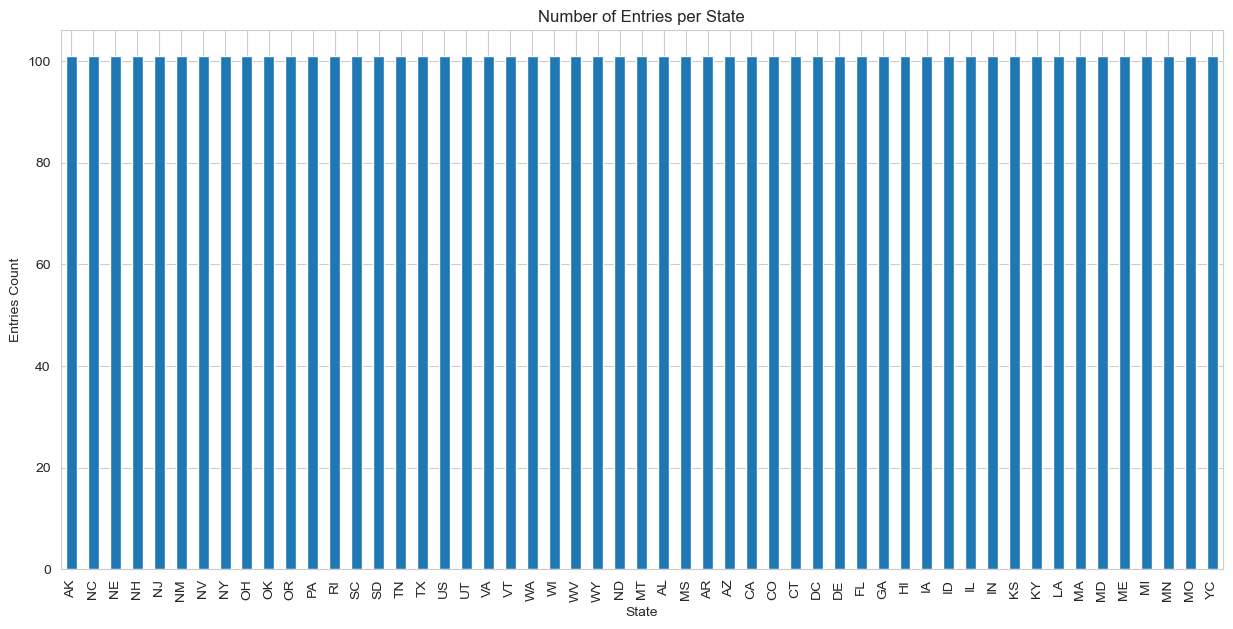

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

state_counts = overdose_deaths_data_final['State'].value_counts()

plt.figure(figsize=(15, 7))
state_counts.plot(kind='bar')
plt.title('Number of Entries per State')
plt.xlabel('State')
plt.ylabel('Entries Count')
plt.xticks(rotation=90)
plt.show()



This  bar chart illustrates the number of entries per state, showing how the data is distributed across different states. This gives an insight into which states have reported more counts within the dataset, which could be indicative of higher numbers of drug overdose deaths or simply more comprehensive reporting.Here we notice that each state has the same number of entries which is great in terms of further analysis

We now proceed to plot a line graph that represents the total number of drug overdose deaths per year. It shows the trend over the years captured in the dataset. This visualization is particularly useful for identifying patterns, such as increases or decreases in drug overdose deaths over time.

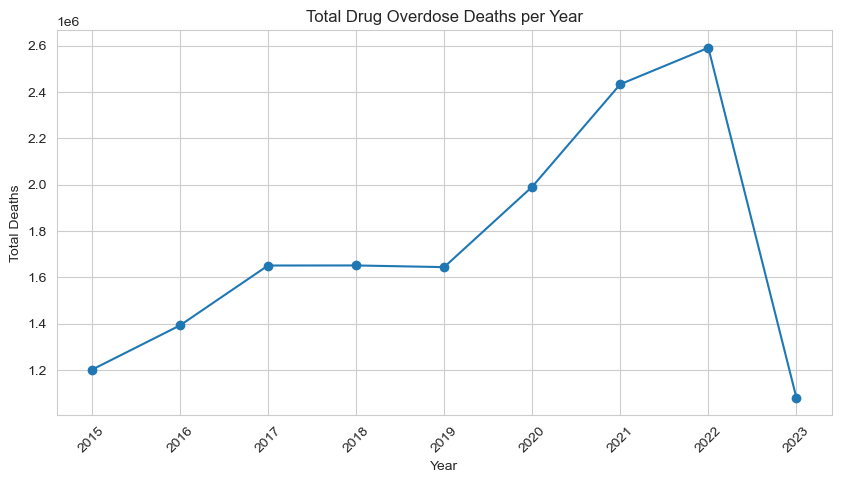

In [37]:
deaths_per_year = overdose_deaths_data_final.groupby('Year')['Deaths'].sum()

plt.figure(figsize=(10, 5))
deaths_per_year.plot(kind='line', marker='o')
plt.title('Total Drug Overdose Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

We notice that there has been a significant increase in total drug overdose deaths per year since 2020 which is when the COVID lockdowns began.We also notice that the year 2023 seemingly has very few deaths this is because our dataset only has the data for a few months of 2023.Let's further examine this in our dataset

In [39]:
data_2023 = overdose_deaths_data_final[overdose_deaths_data_final['Year'] == 2023]
months_2023 = data_2023['Month'].unique()

months_2023

array(['April', 'February', 'January', 'March', 'May'], dtype=object)

Therefore we notice that we only have data upto May of 2023. A reasonable deduction would say that since we have only 5 months out of 12 of the year we can expect the total deaths to be approximate 40% of what it should be for the whole year.This is not the case , the total number of deaths is much lower, therefore we can conclude that overdose deaths may be much higher during the winter which is a period of increased isolation. Let us check this hunch by some further EDA

In [40]:
monthly_deaths = overdose_deaths_data_final.groupby('Month')['Deaths'].sum().sort_values(ascending=False)

monthly_deaths

Month
May          1409852.0
April        1402126.0
March        1393178.0
February     1383818.0
January      1375616.0
December     1271302.0
November     1260106.0
October      1250094.0
September    1239768.0
August       1229362.0
July         1218722.0
June         1207230.0
Name: Deaths, dtype: float64

This analysis gives us the idea that May , April , March, and the months that we did not intuitively expect have the highest number of Overdose deaths.However, upon further consideration I realized that this included the year 2023 which only has the data for those specific months for every state which skews the analysis completely. SO we proceed to redo this analysis but now excluding the year 2023.

In [41]:
data_excluding_2023 = overdose_deaths_data_final[overdose_deaths_data_final['Year'] != 2023]

monthly_deaths_excluding_2023 = data_excluding_2023.groupby('Month')['Deaths'].sum().sort_values(ascending=False)

monthly_deaths_excluding_2023

Month
December     1271302.0
November     1260106.0
October      1250094.0
September    1239768.0
August       1229362.0
July         1218722.0
June         1207230.0
May          1196774.0
April        1186700.0
March        1176834.0
February     1166434.0
January      1157046.0
Name: Deaths, dtype: float64

When excluding the year 2023, the month with the highest total number of reported drug overdose deaths is December, followed by November and October. The months are again listed in descending order of the total number of deaths. This suggests a different pattern compared to when including 2023, with later months in the year showing higher death counts. This could indicate seasonal trends or other annual factors affecting the data.

Lets visualize this to be able to better understand this trend

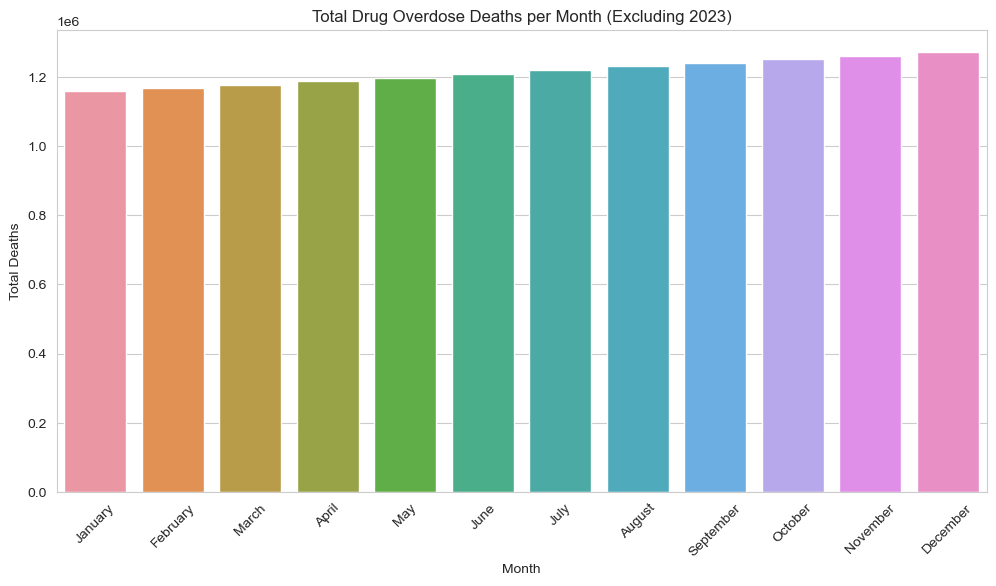

In [42]:

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_deaths_excluding_2023 = monthly_deaths_excluding_2023.reindex(months_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_deaths_excluding_2023.index, y=monthly_deaths_excluding_2023.values)
plt.title('Total Drug Overdose Deaths per Month (Excluding 2023)')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

The bar chart visualizes the total drug overdose deaths per month, excluding data from the year 2023. The deaths appear to be higher in the later months of the year, with December being the highest. This visualization helps in identifying possible seasonal trends and could be a basis for further investigation into what causes these monthly differences.Isolation during these winter months could be a possible cause. The same isolation that could be caused by stringent Covid restrictions. This reinfirces the importnace of our overarching question that we are attempting to solve

Let's move on to the next dataset. We'll follow similar steps to load, inspect,clean and visualize the data. The next dataset is the unemployment data.

<h3>Unemployment Dataset </h3>

This is an Excel file hosted on the website of the United States Department of Agriculture (USDA) Economic Research Service (ERS). 
For direct access and exploration of the dataset, here is the link:

[USDA ERS Unemployment Data](https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.xlsx?v=7156)

This is a comprehensive dataset spanning from the year 2000 to 2022, detailing unemployment and median household income statistics for the U.S., states, and counties. It includes various data points such as the labor force, employment, unemployment figures, unemployment rates, and median household income. 

In [43]:
import pandas as pd

unemployment_data = pd.read_excel('/Users/mauryan/Desktop/Final_Project/Unemployment.xlsx')

unemployment_data.head()

,"Unemployment and median household income for the U.S., States, and counties, 2000–22",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
0,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
4,00000,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,4,...,162229903,153544980,8684923,5.4,164781642,158766998,6014644,3.7,69717,NaN


It seems like the proper header hasn't loaded by default so we skip the first few rows which contain the descriptive text and not the actual data,since the first row after skipping contains the column headers, we'll use it as the header row, we will then reset the index



In [45]:

unemployment_data = pd.read_excel('/Users/mauryan/Desktop/Final_Project/Unemployment.xlsx', skiprows=3)

unemployment_data.columns = unemployment_data.iloc[0]
unemployment_data = unemployment_data[1:]

unemployment_data.reset_index(drop=True, inplace=True)

unemployment_data.head()

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,00000,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,4,...,162229903,153544980,8684923,5.4,164781642,158766998,6014644,3.7,69717,NaN
1,01000,AL,Alabama,NaN,NaN,NaN,2147173,2047731,99442,4.6,...,2259349,2183330,76019,3.4,2286028,2226670,59358,2.6,53990,100
2,01001,AL,"Autauga County, AL",2,2,1,21861,20971,890,4.1,...,26545,25809,736,2.8,26789,26181,608,2.3,66444,123.1
3,01003,AL,"Baldwin County, AL",3,2,1,69979,67370,2609,3.7,...,99953,97034,2919,2.9,102849,100432,2417,2.4,65658,121.6
4,01005,AL,"Barbour County, AL",6,6,0,11449,10812,637,5.6,...,8280,7821,459,5.5,8241,7906,335,4.1,38649,71.6



The data now appears properly formatted and ready for analysis. We will now check for missing values, ensuring that the data types are correct for each column, and possibly removing or imputing missing data as needed.


In [46]:
missing_values_summary = unemployment_data.isnull().sum()

data_types_summary = unemployment_data.dtypes

missing_values_summary, data_types_summary

(0
 FIPS_Code                                     0
 State                                         0
 Area_Name                                     0
 Rural_Urban_Continuum_Code_2013              58
 Urban_Influence_Code_2013                    58
                                              ..
 Employed_2022                                 4
 Unemployed_2022                               4
 Unemployment_rate_2022                        4
 Median_Household_Income_2021                 83
 Med_HH_Income_Percent_of_State_Total_2021    84
 Length: 100, dtype: int64,
 0
 FIPS_Code                                    object
 State                                        object
 Area_Name                                    object
 Rural_Urban_Continuum_Code_2013              object
 Urban_Influence_Code_2013                    object
                                               ...  
 Employed_2022                                object
 Unemployed_2022                              object
 Un

This dataset is a prime example of one that does not follow tidy data principles, this has a 100 coloumns!!Instead of spending time and processing power melting this dataset we shall now drop all the coloumns that are not necessary

In [47]:
unemployment_rate_cols = [col for col in unemployment_data.columns if 'Unemployment_rate' in col]
columns_to_keep = ['FIPS_Code', 'State', 'Area_Name'] + unemployment_rate_cols

unemployment_rates_data = unemployment_data[columns_to_keep]

unemployment_rates_data.head()

,FIPS_Code,State,Area_Name,Unemployment_rate_2000,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,...,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022
0,00000,US,United States,4,4.7,5.8,6,5.5,5.1,4.6,...,7.4,6.2,5.3,4.9,4.4,3.9,3.7,8.1,5.4,3.7
1,01000,AL,Alabama,4.6,5.2,5.9,6,5.6,4.4,4,...,7.3,6.7,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.6
2,01001,AL,"Autauga County, AL",4.1,4.1,4.8,5,4.7,3.8,3.3,...,6.3,5.8,5.2,5.1,4,3.6,2.9,5.3,2.8,2.3
3,01003,AL,"Baldwin County, AL",3.7,4.3,5,4.9,5.1,4,3.2,...,6.7,6.1,5.6,5.4,4.2,3.6,2.9,6.1,2.9,2.4
4,01005,AL,"Barbour County, AL",5.6,7.6,7.7,7.1,7.1,5.7,5.6,...,10.4,10.5,8.9,8.4,6,5.1,4,7.7,5.5,4.1


The resulting dataset now focuses exclusively on the geographical identifiers and the unemployment rates from 2000 to 2022. This dataset is prepared for analysis on how unemployment rates have changed over time across different regions.

In [51]:

nan_values = unemployment_rates_data.isnull().sum().sum()

nan_values, unemployment_rates_data.head()


(225,
 0 FIPS_Code State           Area_Name Unemployment_rate_2000  \
 0     00000    US       United States                      4   
 1     01000    AL             Alabama                    4.6   
 2     01001    AL  Autauga County, AL                    4.1   
 3     01003    AL  Baldwin County, AL                    3.7   
 4     01005    AL  Barbour County, AL                    5.6   
 
 0 Unemployment_rate_2001 Unemployment_rate_2002 Unemployment_rate_2003  \
 0                    4.7                    5.8                      6   
 1                    5.2                    5.9                      6   
 2                    4.1                    4.8                      5   
 3                    4.3                      5                    4.9   
 4                    7.6                    7.7                    7.1   
 
 0 Unemployment_rate_2004 Unemployment_rate_2005 Unemployment_rate_2006  ...  \
 0                    5.5                    5.1                    4.

It seems like there are 225 missing values across all coloumns we are going to proceed with dropping these.

In [52]:
unemployment_rates_data_cleaned = unemployment_rates_data.dropna()

cleaned_shape = unemployment_rates_data_cleaned.shape

cleaned_shape, unemployment_rates_data_cleaned.head()

((3180, 26),
 0 FIPS_Code State           Area_Name Unemployment_rate_2000  \
 0     00000    US       United States                      4   
 1     01000    AL             Alabama                    4.6   
 2     01001    AL  Autauga County, AL                    4.1   
 3     01003    AL  Baldwin County, AL                    3.7   
 4     01005    AL  Barbour County, AL                    5.6   
 
 0 Unemployment_rate_2001 Unemployment_rate_2002 Unemployment_rate_2003  \
 0                    4.7                    5.8                      6   
 1                    5.2                    5.9                      6   
 2                    4.1                    4.8                      5   
 3                    4.3                      5                    4.9   
 4                    7.6                    7.7                    7.1   
 
 0 Unemployment_rate_2004 Unemployment_rate_2005 Unemployment_rate_2006  ...  \
 0                    5.5                    5.1               

After dropping rows with any missing values, the unemployment rates dataset now has 3,180 complete entries. The dataset is clean, with each row fully populated across all selected columns, including 'FIPS_Code', 'State', 'Area_Name', and all 'Unemployment_rate' columns from 2000 to 2022.

This cleaned dataset is ready for exploratory data analysis without concerns of missing data.

Before we begin , we need to melt the data and convert Year to an integer

In [54]:

unemployment_rates_melted_correct = unemployment_rates_data.melt(id_vars=['FIPS_Code', 'State', 'Area_Name'], 
                                                                   var_name='Year', 
                                                                   value_name='Unemployment Rate')

unemployment_rates_melted_correct = unemployment_rates_melted_correct[
    unemployment_rates_melted_correct['Year'].str.contains('Unemployment_rate')
]

unemployment_rates_melted_correct['Year'] = unemployment_rates_melted_correct['Year'].str.extract('(\d+)').astype(int)



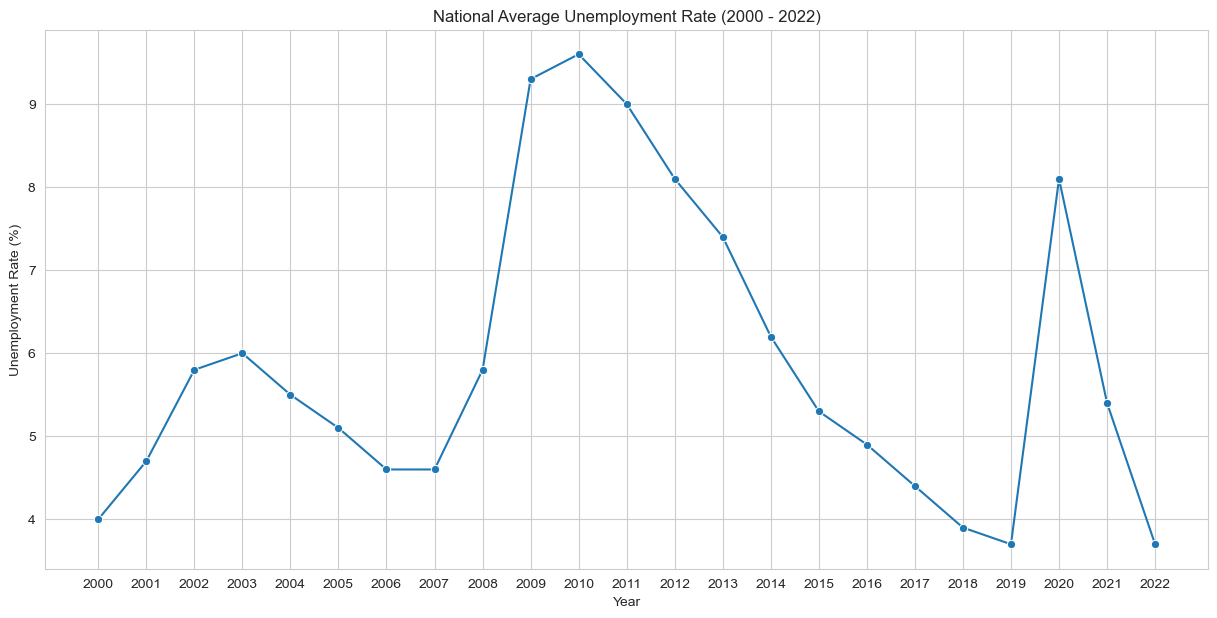

,FIPS_Code,State,Area_Name,Year,Unemployment Rate
0,00000,US,United States,2000,4
3277,00000,US,United States,2001,4.7
6554,00000,US,United States,2002,5.8
9831,00000,US,United States,2003,6
13108,00000,US,United States,2004,5.5


In [55]:

national_unemployment_rates_correct = unemployment_rates_melted_correct[
    unemployment_rates_melted_correct['Area_Name'] == 'United States'
]

plt.figure(figsize=(15, 7))
sns.lineplot(
    data=national_unemployment_rates_correct,
    x='Year',
    y='Unemployment Rate',
    marker='o'
)
plt.title('National Average Unemployment Rate (2000 - 2022)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(national_unemployment_rates_correct['Year'])
plt.grid(True)
plt.show()

national_unemployment_rates_correct.head()

Here we notice that there seems to be a big spike in the unemployment rate in 2020 right when the lockdown began.

Let's move on to the next dataset. We'll follow similar steps to load, inspect,clean and visualize the data.

<h3>COVID Lockdown Stringency Index Data for US States </h3>

The dataset contains information about the stringency of lockdown measures taken by different states in the US during the COVID-19 pandemic. This data includes indices and indicators that reflect the severity and extent of lockdown measures, such as school and workplace closures, restrictions on gatherings, and movement limitations. It also contains related data like COVID-19 case counts, death rates, and possibly demographic or political information for deeper analysis.

For direct access to the dataset and to explore the data further, here is the link:

[COVID Lockdown Stringency Index Data for US States on Exploratory.io](https://exploratory.io/data/kanaugust/COVID-Lockdown-Stringency-Index-Data-for-US-States-bhy2lKV7UZ).

We load the third dataset to see the first few rows and understand its structure


In [56]:
file_path_covid = '/Users/mauryan/Desktop/Final_Project/COVID Lockdown Stringency Index Data for US States.csv'
covid_data = pd.read_csv(file_path_covid)

covid_data.head()

,CountryName,CountryCode,RegionName,Region_Country,Region_Code2,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,...,State,Population,new_cases,new_deaths,Cases per 1M,Death per 1M,Cumulative Death per 1M,State_Code,state,party
0,United States,USA,Alaska,US,AK,STATE_TOTAL,2020-02-01,0,NaN,0,...,Alaska,731158,NaN,NaN,NaN,NaN,0.0,AK,Alaska,Republican
1,United States,USA,Alaska,US,AK,STATE_TOTAL,2020-02-02,0,NaN,0,...,Alaska,731158,0.0,0.0,0.0,0.0,0.0,AK,Alaska,Republican
2,United States,USA,Alaska,US,AK,STATE_TOTAL,2020-02-03,0,NaN,0,...,Alaska,731158,0.0,0.0,0.0,0.0,0.0,AK,Alaska,Republican
3,United States,USA,Alaska,US,AK,STATE_TOTAL,2020-02-04,0,NaN,0,...,Alaska,731158,0.0,0.0,0.0,0.0,0.0,AK,Alaska,Republican
4,United States,USA,Alaska,US,AK,STATE_TOTAL,2020-02-05,0,NaN,0,...,Alaska,731158,0.0,0.0,0.0,0.0,0.0,AK,Alaska,Republican


To examine the dataset, let's start by looking at a summary of the data to understand its completeness and the types of data it contains.Then we will look for any duplicate entries in the dataset.We should also get a statistical summary of the numerical columns to understand the distributions.


In [60]:
covid_data_info = covid_data.info()

duplicate_entries = covid_data.duplicated().sum()

statistical_summary = covid_data.describe()

covid_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19693 entries, 0 to 19692
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            19693 non-null  object 
 1   CountryCode                            19693 non-null  object 
 2   RegionName                             19693 non-null  object 
 3   Region_Country                         19693 non-null  object 
 4   Region_Code2                           19693 non-null  object 
 5   Jurisdiction                           19693 non-null  object 
 6   Date                                   19693 non-null  object 
 7   C1_School closing                      19693 non-null  int64  
 8   C1_Flag                                17618 non-null  float64
 9   C2_Workplace closing                   19693 non-null  int64  
 10  C2_Flag                                17707 non-null  float64
 11  C3

In [61]:

duplicate_entries

0

In [62]:
statistical_summary

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,...,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Population,new_cases,new_deaths,Cases per 1M,Death per 1M,Cumulative Death per 1M
count,19693.000000,17618.000000,19693.000000,17707.000000,19692.000000,17657.000000,19693.000000,15615.000000,19692.000000,8461.000000,...,19692.000000,19692.000000,19684.000000,19684.000000,1.969300e+04,19643.000000,19643.000000,19643.000000,19643.000000,19693.000000
mean,2.131823,0.421614,1.476819,0.775908,1.366392,0.798663,2.704667,0.718924,0.500102,0.321002,...,54.277869,54.277869,50.824909,50.824909,6.576328e+06,1450.269358,26.018073,219.557414,3.691712,494.528373
std,0.953408,0.493831,0.789836,0.416995,0.662461,0.401010,1.529790,0.449539,0.625211,0.466889,...,15.935426,15.935426,27.365377,27.365377,7.330555e+06,3106.174753,60.029480,295.997806,5.962249,553.675122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.410000,6.410000,0.000000,0.000000,5.823280e+05,-400.000000,0.000000,-131.990462,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,51.150000,51.150000,37.500000,37.500000,1.826913e+06,71.000000,0.000000,29.340639,0.000000,51.546767
50%,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,...,58.010000,58.010000,62.500000,62.500000,4.645318e+06,473.000000,7.000000,108.506850,1.593240,282.962712
75%,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,...,63.780000,63.780000,62.500000,62.500000,7.693612e+06,1425.000000,25.000000,292.348720,4.627158,762.555980
max,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,1.000000,...,79.490000,79.490000,100.000000,100.000000,3.936808e+07,62168.000000,1273.000000,4501.832801,148.250658,2617.769512


The dataset "COVID Lockdown Stringency Index Data for US States" has 19,693 entries and 60 columns.
 It is free of duplicate entries, which is good for data integrity. A summary of the dataset reveals:

- There are several columns with missing values (`NaN`). These include flag indicators for various policies (`C1_Flag`, `C2_Flag`, `C3_Flag`, etc.) and specific measures like public transport closure (`C5_Close public transport`).
- The data types are mostly integers and floats, with some object types for categorical and textual data like `CountryName` and `Date`.
- The statistical summary provides insights into the range and distribution of numerical values, including new COVID-19 cases, deaths, and various indices measuring the stringency of lockdown measures and economic support.


We will now identify all the flag columns which usually end with 'Flag' and drop all the flag columns from the dataframe. We will then convert the 'Date' column to datetime

In [75]:

flag_columns = [col for col in covid_data.columns if 'Flag' in col]

covid_data_dropped_flags = covid_data.drop(columns=flag_columns)

covid_data_dropped_flags['Date'] = pd.to_datetime(covid_data_dropped_flags['Date'])

covid_data_dropped_flags_shape = covid_data_dropped_flags.shape

covid_data_dropped_flags_shape, covid_data_dropped_flags.head()

((19693, 49),
      CountryName CountryCode RegionName Region_Country Region_Code2  \
 0  United States         USA     Alaska             US           AK   
 1  United States         USA     Alaska             US           AK   
 2  United States         USA     Alaska             US           AK   
 3  United States         USA     Alaska             US           AK   
 4  United States         USA     Alaska             US           AK   
 
   Jurisdiction       Date  C1_School closing  C2_Workplace closing  \
 0  STATE_TOTAL 2020-02-01                  0                     0   
 1  STATE_TOTAL 2020-02-02                  0                     0   
 2  STATE_TOTAL 2020-02-03                  0                     0   
 3  STATE_TOTAL 2020-02-04                  0                     0   
 4  STATE_TOTAL 2020-02-05                  0                     0   
 
    C3_Cancel public events  ...   State  Population  new_cases  new_deaths  \
 0                      0.0  ...  Alaska     

Furthermore we convert 'Date' to datetime and create 'Year' and 'Month' columns and then define the aggregation methods for each column. We carefully select the necessary columns for aggregation

In [77]:


covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data['Year'] = covid_data['Date'].dt.year
covid_data['Month'] = covid_data['Date'].dt.month

aggregations = {
    'ConfirmedCases': 'mean',
    'ConfirmedDeaths': 'mean',
    'StringencyIndex': 'mean',
    'Population': 'max', 
}

necessary_columns = [
    'CountryName', 'RegionName', 'Region_Code2', 'Year', 'Month',
    'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex', 'State', 'Population', 'party'
]

covid_data_for_aggregation = covid_data[necessary_columns]

covid_data_monthly_avg = covid_data_for_aggregation.groupby(
    ['CountryName', 'RegionName', 'Region_Code2', 'State', 'Year', 'Month', 'party']
).agg(aggregations).reset_index()

covid_data_monthly_avg.shape, covid_data_monthly_avg.head()

((650, 11),
      CountryName RegionName Region_Code2    State  Year  Month       party  \
 0  United States    Alabama           AL  Alabama  2020      2  Republican   
 1  United States    Alabama           AL  Alabama  2020      3  Republican   
 2  United States    Alabama           AL  Alabama  2020      4  Republican   
 3  United States    Alabama           AL  Alabama  2020      5  Republican   
 4  United States    Alabama           AL  Alabama  2020      6  Republican   
 
    ConfirmedCases  ConfirmedDeaths  StringencyIndex  Population  
 0        0.000000         0.000000         5.368276     4921532  
 1      217.258065         1.709677        38.753548     4921532  
 2     4249.200000       133.366667        78.873667     4921532  
 3    12177.451613       465.741935        66.784194     4921532  
 4    27091.266667       789.900000        52.005000     4921532  )

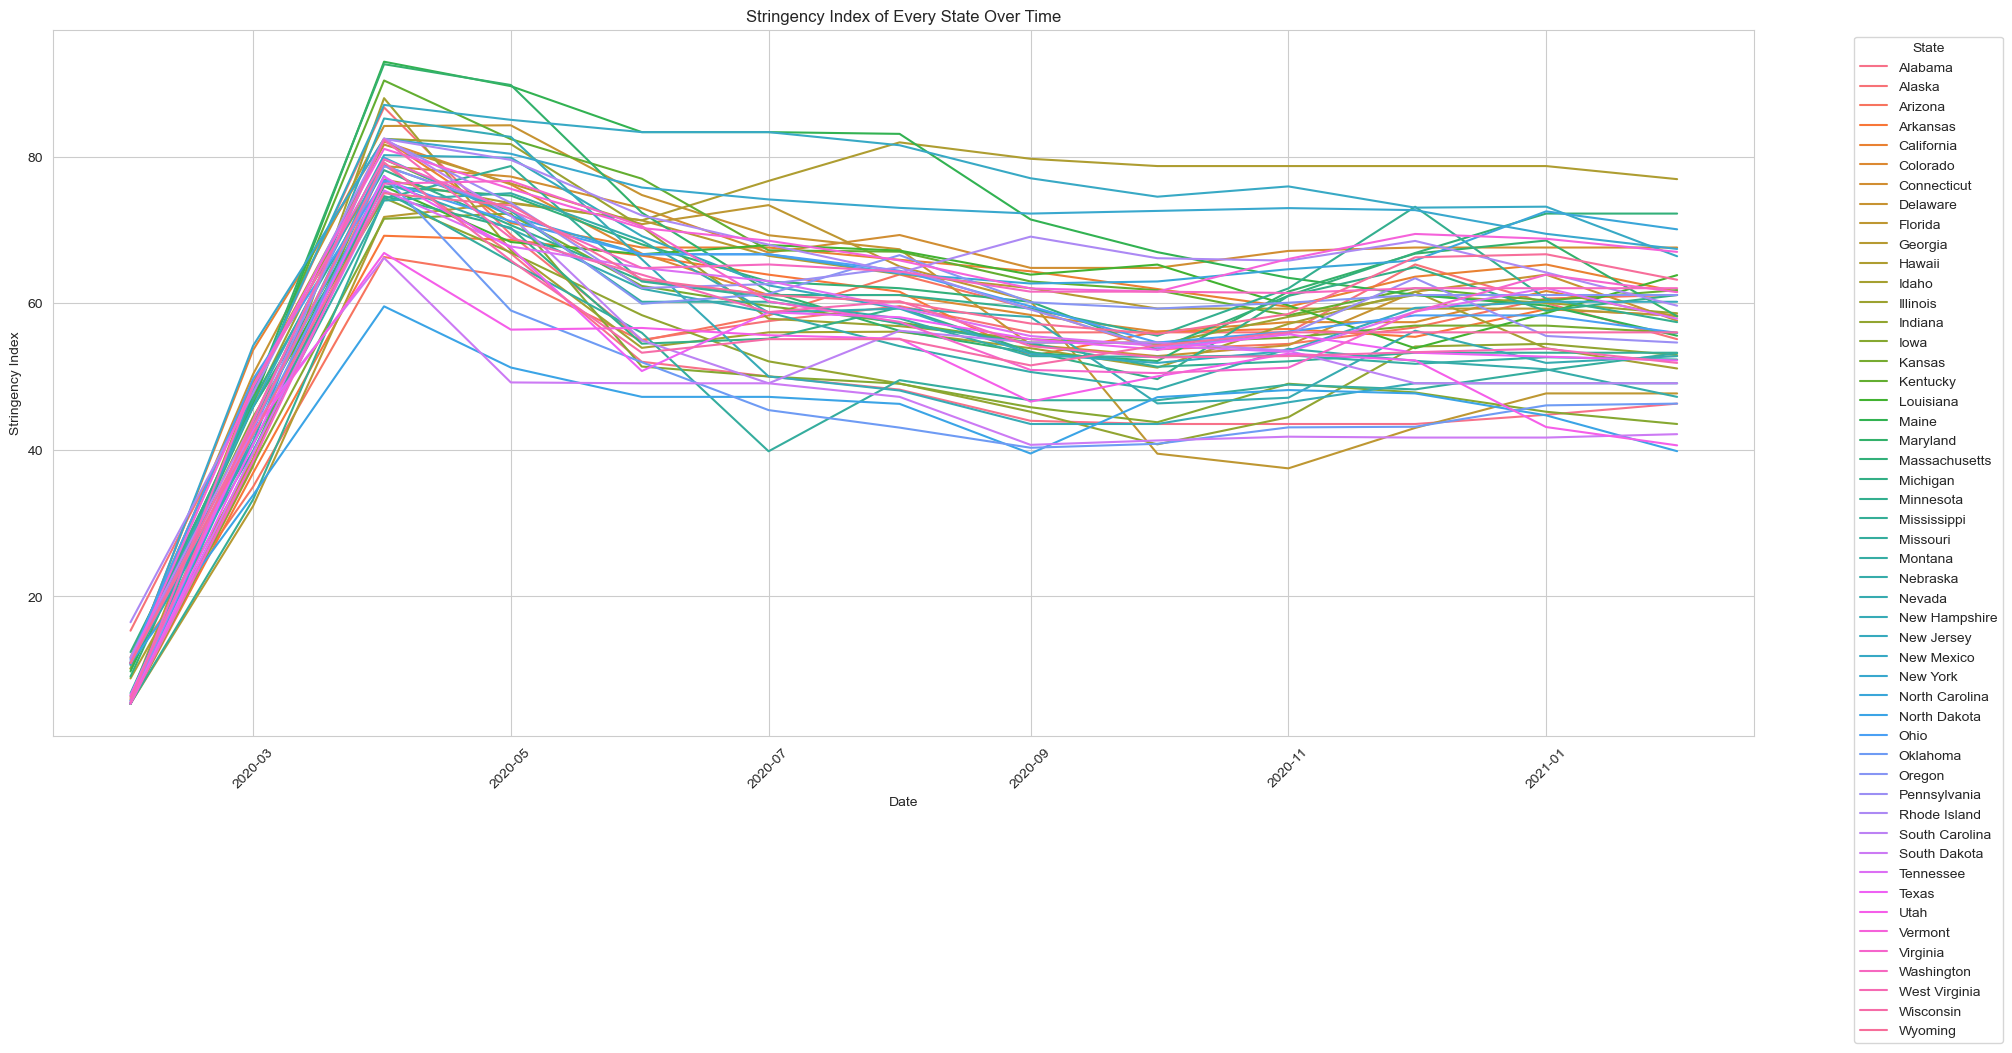

In [79]:
covid_data_monthly_avg['FullDate'] = pd.to_datetime(covid_data_monthly_avg['Year'].astype(str) + '-' +
                                                covid_data_monthly_avg['Month'].astype(str) + '-01')

plt.figure(figsize=(20, 10))
sns.lineplot(data=covid_data_monthly_avg, x='FullDate', y='StringencyIndex', hue='State', legend='full')
plt.title('Stringency Index of Every State Over Time')
plt.xlabel('Date')
plt.ylabel('Stringency Index')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

<h2>Data Aggregation</h2>

Here we begin our intial attempts at data aggregation. We first convert the month names to numbers for the overdose dataset.Then wereate the 'YearMonth' column for both datasets and merge the datasets on 'State' and 'YearMonth'. The combined_data DataFrame now contains both the overdose deaths and stringency index per month per state.





In [101]:
overdose_merge_final=overdose_deaths_data_final.copy()
covid_data_final_merge=covid_data_monthly_avg.copy()
months = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
}
overdose_merge_final['MonthNum'] = overdose_merge_final['Month'].map(months)

overdose_merge_final['YearMonth'] = overdose_merge_final['Year'].astype(str) + overdose_merge_final['MonthNum']
covid_data_final_merge['YearMonth'] = covid_data_final_merge['Year'].astype(str) + covid_data_final_merge['Month'].astype(str).str.zfill(2)

combined_data = pd.merge(
    overdose_merge_final,
    covid_data_final_merge,
    left_on=['State', 'YearMonth'],
    right_on=['Region_Code2', 'YearMonth'],
    how='inner'
)

combined_data.head()

,State_x,Year_x,Month_x,Period,Indicator,Deaths,State Name,Predicted Value,MonthNum,YearMonth,...,Region_Code2,State_y,Year_y,Month_y,party,ConfirmedCases,ConfirmedDeaths,StringencyIndex,Population,FullDate
0,AK,2020,April,12 month-ending,Number of Drug Overdose Deaths,120.0,Alaska,120.0,04,202004,...,AK,Alaska,2020,4,Republican,280.100000,7.666667,86.697333,731158,2020-04-01
1,AK,2020,August,12 month-ending,Number of Drug Overdose Deaths,139.0,Alaska,139.0,08,202008,...,AK,Alaska,2020,8,Republican,5059.612903,29.419355,59.600645,731158,2020-08-01
2,AK,2020,December,12 month-ending,Number of Drug Overdose Deaths,146.0,Alaska,146.0,12,202012,...,AK,Alaska,2020,12,Republican,41463.129032,172.967742,65.280000,731158,2020-12-01
3,AK,2020,February,12 month-ending,Number of Drug Overdose Deaths,125.0,Alaska,125.0,02,202002,...,AK,Alaska,2020,2,Republican,0.000000,0.000000,15.328276,731158,2020-02-01
4,AK,2020,July,12 month-ending,Number of Drug Overdose Deaths,135.0,Alaska,135.0,07,202007,...,AK,Alaska,2020,7,Republican,2205.419355,18.000000,57.557742,731158,2020-07-01


We further clean the data

In [102]:
columns_to_drop = ['Year_x', 'Month_x', 'Period','RegionName', 'Predicted Value', 'MonthNum', 'YearMonth', 
                   'Region_Code2', 'State_y', 'Year_y', 'Month_y']
combined_data = combined_data.drop(columns=columns_to_drop, axis=1)
combined_data.head(),combined_data.shape

(  State_x                       Indicator  Deaths State Name    CountryName  \
 0      AK  Number of Drug Overdose Deaths   120.0     Alaska  United States   
 1      AK  Number of Drug Overdose Deaths   139.0     Alaska  United States   
 2      AK  Number of Drug Overdose Deaths   146.0     Alaska  United States   
 3      AK  Number of Drug Overdose Deaths   125.0     Alaska  United States   
 4      AK  Number of Drug Overdose Deaths   135.0     Alaska  United States   
 
         party  ConfirmedCases  ConfirmedDeaths  StringencyIndex  Population  \
 0  Republican      280.100000         7.666667        86.697333      731158   
 1  Republican     5059.612903        29.419355        59.600645      731158   
 2  Republican    41463.129032       172.967742        65.280000      731158   
 3  Republican        0.000000         0.000000        15.328276      731158   
 4  Republican     2205.419355        18.000000        57.557742      731158   
 
     FullDate  
 0 2020-04-01  
 1 2

We now proceed to do some light EDA to gain more insights. My hunch is that as Florida was more lax on lockdowns than California it might have a lower stringecy index and lower number of deaths possible due to isolation which eventually succumbed to drugs

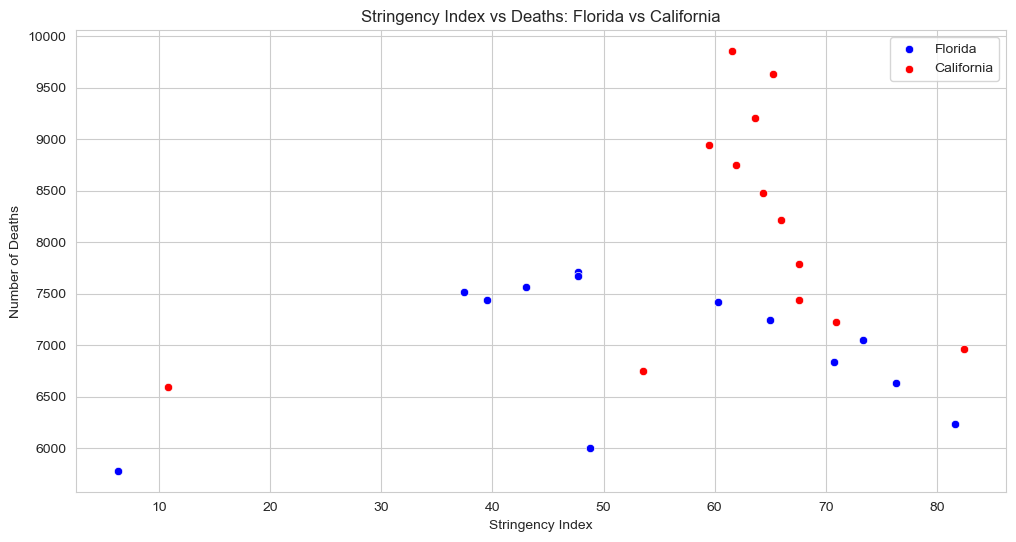

In [113]:
florida_data = combined_data[combined_data['State_x'] == 'FL']
california_data = combined_data[combined_data['State_x'] == 'CA']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=florida_data, x='StringencyIndex', y='Deaths', color='blue', label='Florida')

sns.scatterplot(data=california_data, x='StringencyIndex', y='Deaths', color='red', label='California')

plt.title('Stringency Index vs Deaths: Florida vs California')
plt.xlabel('Stringency Index')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

However this isnt very clear to visualize or glean any important information

So we plot another graph of Deaths over time for both states

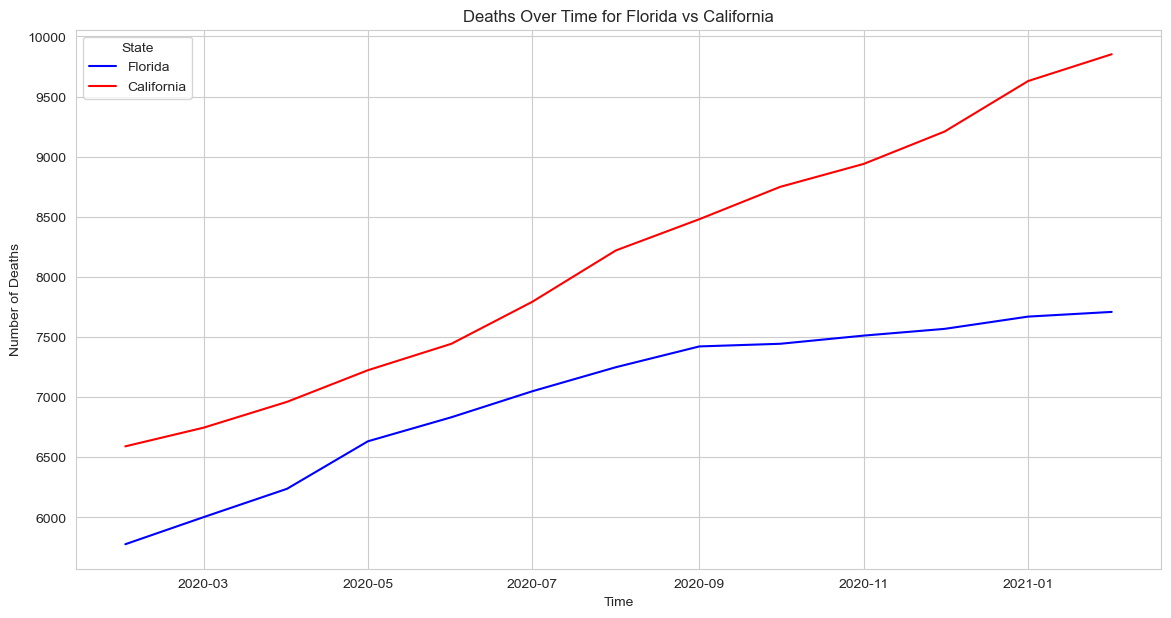

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns


florida_data = combined_data[combined_data['State_x'] == 'FL']
california_data = combined_data[combined_data['State_x'] == 'CA']

plt.figure(figsize=(14, 7))


sns.lineplot(data=florida_data, x='FullDate', y='Deaths', label='Florida', color='blue')

sns.lineplot(data=california_data, x='FullDate', y='Deaths', label='California', color='red')

plt.title('Deaths Over Time for Florida vs California')
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.legend(title='State')
plt.show()

The preliminary observation indicates that California reports a higher number of drug overdose deaths compared to Florida, which aligns with its larger population base. This finding suggests that the initial assumption regarding the impact of stringent lockdown measures potentially leading to an increase in drug overdose deaths may require a more nuanced analysis. To explore this hypothesis rigorously, I will develop and test statistical models that account for various factors, including population size, stringency of lockdown measures, and other relevant variables. These models will enable a data-driven approach to assess the relationship between public health policies and overdose mortality rates, leading to conclusions grounded in empirical evidence.

<h2>Model Questions:</h2>



### Model Question 1: Assessing the Association Between Lockdown Stringency and Drug Overdose Mortality Rates
**Research Objective**: To evaluate whether there is a statistically significant association between the stringency of lockdown measures and the drug overdose mortality rate, adjusting for population size and other confounders.

**Model Type**: Poisson or Negative Binomial Regression Model

**Variables**:
- **Dependent Variable**: Drug overdose mortality rate (number of deaths per 100,000 population)
- **Key Independent Variable**: Lockdown Stringency Index
- **Control Variables**: Unemployment rate, COVID-19 case and death rates


### Model Question 2: Comparative Analysis of Policy Impact on Drug Overdose Deaths in Different States
**Research Objective**: To perform a comparative analysis of how different states' policy responses to the pandemic may have impacted drug overdose deaths, with a focus on contrasting states with similar population sizes but different policy stringency.

**Model Type**: Propensity Score Matching or Difference-in-Differences Model

**Variables**:
- **Outcome Variable**: Drug overdose death counts or rates
- **Treatment Variable**: Categorical variable representing high, medium, and low stringency policy responses
- **Covariates**: Unemplyment rate and political affiliation
